<a href="https://colab.research.google.com/github/jesinthnalini001/Codes/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing all the important libraries


In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive

drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [5]:
# Defining the path for train and test images
train_path="gdrive/My Drive/CNN_assignment/Train/"
test_path="gdrive/My Drive/CNN_assignment/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

Mounted at /content/gdrive
This dataset has about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## 2. Data Preparation


In [7]:
#Use 80% of the images for training, and 20% for validation.


batch_size = 32
img_height = 180
img_width = 180

### 2.1 Train Data Set Creation


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### 2.2 Validation Data Set Creation

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3. Visualizing the data

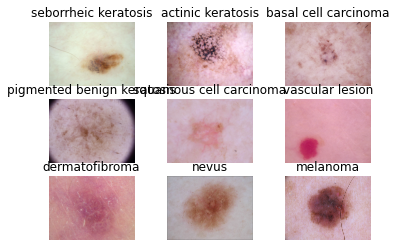

In [11]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

In [12]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

#Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model 0<br>
### 4.1 Creating the model


In [13]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 4.2 Compiling the model

In [14]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 459s 5s/step - loss: 3.0743 - accuracy: 0.2305 - val_loss: 2.0870 - val_accuracy: 0.2685
Epoch 2/20
56/56 [==============================] - 127s 2s/step - loss: 1.7440 - accuracy: 0.3968 - val_loss: 1.9164 - val_accuracy: 0.2774
Epoch 3/20
56/56 [==============================] - 126s 2s/step - loss: 1.6699 - accuracy: 0.4040 - val_loss: 1.6309 - val_accuracy: 0.4206
Epoch 4/20
56/56 [==============================] - 122s 2s/step - loss: 1.5342 - accuracy: 0.4682 - val_loss: 1.5150 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 130s 2s/step - loss: 1.4435 - accuracy: 0.5011 - val_loss: 1.4869 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 127s 2s/step - loss: 1.3944 - accuracy: 0.5039 - val_loss: 1.4737 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 125s 2s/step - loss: 1.2947 - accuracy: 0.5497 - val_loss: 1.5663 - val_accuracy: 0.4698
Epoch 8/20
56

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### 4.4 Visualizing training results


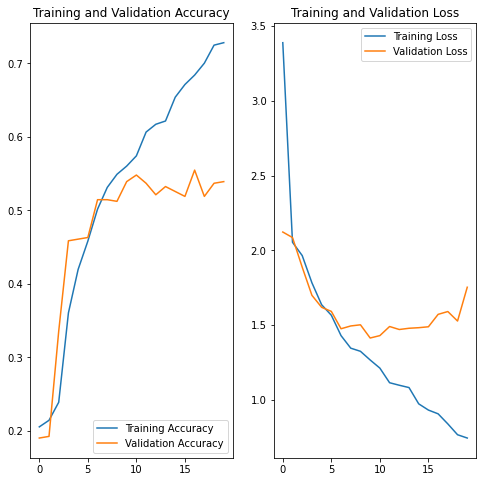

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 4.5 Observations<br>
The accuracy of the model for the Training data set is at 78%. But the Validation accuracy is not in par with the training accuracy.<br>
It is only at 53%. The validation loss as observed is very high.
This could also be indicative of some Overfit in the model.<br>
We could add some Dropout layers and remove the BatchNormalization layers.
And by adding a few more layers, we could improve the accuracy by trying to extract more features.


## 5. Model 1<br>
### 5.1 Creating the Model


In [16]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 5.2 Compiling the model

In [17]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 5.3 Training the model

In [18]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 480s 8s/step - loss: 2.6789 - accuracy: 0.2009 - val_loss: 2.0841 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 476s 9s/step - loss: 2.0596 - accuracy: 0.1735 - val_loss: 2.0545 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 471s 8s/step - loss: 2.0428 - accuracy: 0.1791 - val_loss: 2.0324 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 471s 8s/step - loss: 2.0401 - accuracy: 0.1975 - val_loss: 2.0342 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 472s 8s/step - loss: 2.0310 - accuracy: 0.1975 - val_loss: 2.0356 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 478s 9s/step - loss: 2.0289 - accuracy: 0.2003 - val_loss: 2.0211 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 456s 8s/step - loss: 2.0155 - accuracy: 0.1897 - val_loss: 2.0112 - val_accuracy: 0.1924
Epoch 8/20
56

### 5.4 Visualizing the results

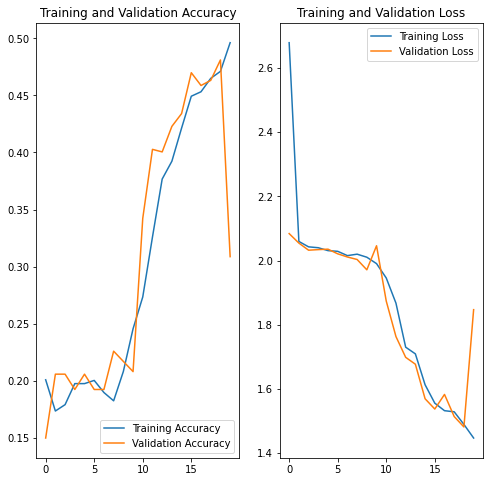

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 5.5 Observations<br>
The model accuracy for Train data set has dropped to nearly 45%.<br>
The accuracy for the Validation set is at 40%.<br>
This is a much better model compared to the previous model as there seems to be No Overfit with the training accuracy 45% and validation accuracy at 40%.

## 6. Data Augmentation<br>
### 6.1 Specifying the Augmentation

In [19]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

### 6.2 Visualizing the Augmented Data


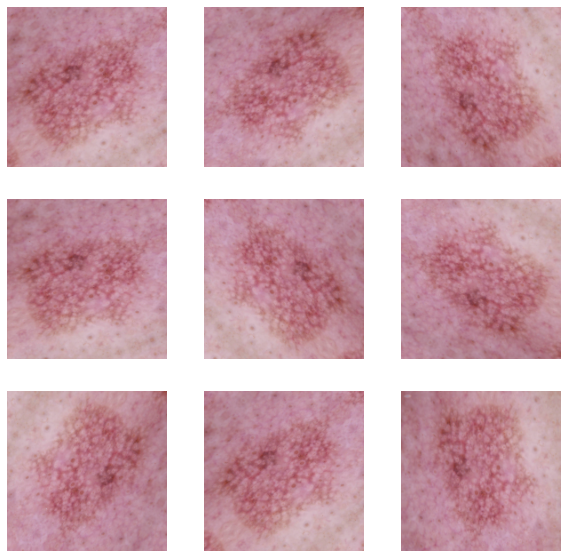

In [20]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

## 7. Model 2

### 7.1 Creating the Model



In [21]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 7.2 Compiling the model

In [22]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 7.3 Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 442s 8s/step - loss: 2.1825 - accuracy: 0.1975 - val_loss: 2.0838 - val_accuracy: 0.1924
Epoch 2/20
51/56 [==========================>...] - ETA: 36s - loss: 2.0328 - accuracy: 0.2010

### 7.4 Visualizing the results


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 7.5 Observations<br>
The model accuracy for Train data set has gone up to nearly 48%.<br> 
The accuracy for the Validation set is also at 48%.<br>
This is a much better model compared to the previous two models as there seems to be No Overfit with the training accuracy 48% and validation accuracy at 48%.<br>
Data Augmentation has improved the model performance.

## 8. Checking for Class Imbalance

In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

The samples of various classes are not in equal proportion.<br>
There is a significant Class Imbalance observed.<br>
The class with the least number of samples is Seborrheic Keratosis with 77.<br>
The class that dominates the data in terms of proportionate number of samples is Pigmented Benign Keratosis with sample size of 462.

## 9. Using Augmentor for Class Imbalance Treatment<br>
### 9.1 Installing Augmentor

In [ ]:
!pip install Augmentor

#To use Augmentor, the following general procedure is followed:

#Instantiate a Pipeline object pointing to a directory containing your initial image data set.
#Define a number of operations to perform on this data set using your Pipeline object.
#Execute these operations by calling the Pipeline’s sample() method.

### 9.2 Using Augmentor

In [ ]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    #Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

## 9.3 Observations<br>
The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.<br>
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## 10. Modelling Augmented Data

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### 10.1 Creating the Train Data Set

In [ ]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

### 10.2 Creating the Validation Data Set

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

## 11. Model 3<br>
### 11.1 Creating the Model

In [ ]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 11.2 Compiling the Model

In [ ]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 11.3 Training the Model


In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### 11.4 Visualizing the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()